In [1]:


import numpy 
import pandas 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
import os
import re


In [37]:

name = ["jute","maize","rice","wheat","sugarcane"]
test_image=[]
test_label=[]
crop_name=[]
for file_name in os.listdir("./test_crop_image"):
    if file_name.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
        imge = cv2.imread("./test_crop_image/" + file_name)
        test_img = tf.image.resize(imge, (224,224))
        #test_img = tf.cast(test_img, tf.uint8)
         # EffiencientDet expects [1,512,512,3]
        #test_img = tf.expand_dims(test_img, axis=0)
        test_image.append(test_img)
        crop_name.append(file_name)
        
        pattern = "(jute)|(rice)|(maize)|(sugarcane)|(wheat)"
        match = re.search(pattern,file_name)
        #print(match.group())
        na1=[i for i in range(5) if(name[i]==match.group())]
        
        test_label.append(na1[0])
        
        
data = {"crop name": crop_name,
        "c_label": test_label}
df1 = pandas.DataFrame(data, columns=["crop name", "c_label"])

print(df1)
print(len(test_image),len(test_label))

                                            crop name  c_label
0                                      jute-field.jpg        0
1                                         jute002.jpg        0
2                                         jute003.jpg        0
3                                          jute03.jpg        0
4                                       jutefield.jpg        0
5                                         juteimg.jpg        0
6                                      juteleaves.jpg        0
7                                       juteplant.jpg        0
8                                      juteplants.jpg        0
9                                 maize corn set2.jpg        1
10                                maize plant set.jpg        1
11                               maize-Field-Corn.jpg        1
12                                    maize-field.jpg        1
13                                  maize-field01.jpg        1
14                             maize00corn-fields.jpg  

In [3]:
# reading the CSV file 
df = pandas.read_csv('Crop_details.csv')
train_image =  df["path"]
l= list(train_image)
label = df["croplabel"]
n=list(label)

In [4]:


T_images = []
T_label = []
 # Read 10 images from the downloaded dataset
for i in range(0,798):
    url = l[i][1: ]
    #print(url)
    img = cv2.imread(url)
   
    # EfficientDet expects 512 by 512
    img = tf.image.resize(img, (224,224))
    # EfficientDet expects uint8
    #img = tf.cast(img, tf.uint8)
    # EffiencientDet expects [1,512,512,3]
    #img = tf.expand_dims(img, axis=0)
    
    T_images.append(img) 
    T_label.append(n[i])
print(len(T_images),len(T_label))
''''
for i in range(10):
    img = images[i].numpy().reshape(512,512,3)
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show() 
'''

798 798


"'\nfor i in range(10):\n    img = images[i].numpy().reshape(512,512,3)\n    plt.subplot(5,2,i+1)\n    plt.imshow(img)\n    plt.axis('off')\nplt.show() \n"

In [5]:

batch_size = 64
dx_train = tf.data.Dataset.from_tensor_slices(T_images)
# apply a one-hot transformation to each label for use in the neural network
#dy_train = tf.data.Dataset.from_tensor_slices(T_label).map(lambda z: tf.one_hot(z, depth=5,on_value=1.0, off_value=0.0,axis=0) )
t = tf.one_hot(T_label, depth=5,
           on_value=1.0, off_value=0.0,
           axis=-1) 
dy_train = tf.data.Dataset.from_tensor_slices(t)
#print(next(iter(dy_train)).numpy().shape)
#dy_train=tf.transpose(dy_train)
print(dy_train)
#print(next(iter(dy_train)).numpy().shape)
# zip the x and y training data together and shuffle, batch etc.
train_dataset = tf.data.Dataset.zip((dx_train, dy_train)).shuffle(798)
print(train_dataset)
train_dataset = train_dataset.batch(batch_size=batch_size, drop_remainder=True)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
print(train_dataset)

#ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

<TensorSliceDataset shapes: (5,), types: tf.float32>
<ShuffleDataset shapes: ((224, 224, 3), (5,)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((64, 224, 224, 3), (64, 5)), types: (tf.float32, tf.float32)>


In [44]:
dx_test = tf.data.Dataset.from_tensor_slices(test_image)
# apply a one-hot transformation to each label for use in the neural network
dy_test = tf.data.Dataset.from_tensor_slices(test_label).map(lambda z: tf.one_hot(z,5 ))

# zip the x and y training data together and shuffle, batch etc.
test_dataset = tf.data.Dataset.zip((dx_test, dy_test))
test_dataset = test_dataset.batch(batch_size=batch_size, drop_remainder=True)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)
print(test_dataset)

<PrefetchDataset shapes: ((64, 224, 224, 3), (64, 5)), types: (tf.float32, tf.float32)>


<TakeDataset shapes: ((64, 224, 224, 3), (64, 5)), types: (tf.float32, tf.float32)>


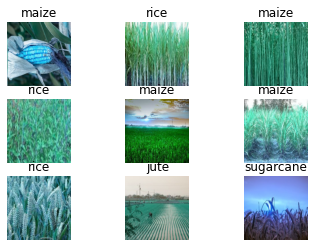

In [52]:
name = ["jute","maize","rice","wheat","sugarcane"]
print(test_dataset.take(9))
for i, (image, label) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[0].numpy().astype("uint8"))
    #print(label[i])
    na=[j for j in range(5) if(label[i][j]==1)]
    plt.title("{}".format(name[na[0]]))
    plt.axis("off")

In [13]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

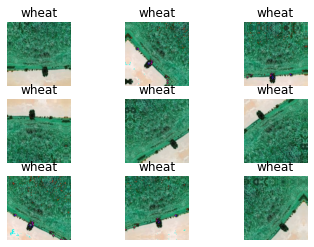

In [31]:
for i, (image, label) in enumerate(train_dataset.take(1)):
    na=[j for j in range(5) if(label[i][j]==1)]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = img_augmentation(image)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(name[na[0]]))
        plt.axis("off")

In [ ]:
#ds_train = train_dataset.batch(batch_size=45, drop_remainder=True)
#ds_train = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

#ds_test = test_dataset.batch(batch_size=45, drop_remainder=True)

In [17]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
NUM_CLASSES = 5
IMG_SIZE =224

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#print (input)
x = img_augmentation(inputs)
#print(x)
x = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
x.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(x.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)


In [18]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()




In [19]:

print(train_dataset)
epochs = 15 
hist = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)
#plot_hist(hist)

<PrefetchDataset shapes: ((64, 224, 224, 3), (64, 5)), types: (tf.float32, tf.float32)>
Epoch 1/15
12/12 - 74s - loss: 1.2371 - accuracy: 0.5872
Epoch 2/15
12/12 - 51s - loss: 0.6502 - accuracy: 0.7956
Epoch 3/15
12/12 - 51s - loss: 0.3727 - accuracy: 0.8854
Epoch 4/15
12/12 - 51s - loss: 0.3730 - accuracy: 0.8880
Epoch 5/15
12/12 - 51s - loss: 0.3500 - accuracy: 0.8945
Epoch 6/15
12/12 - 52s - loss: 0.2361 - accuracy: 0.9336
Epoch 7/15
12/12 - 52s - loss: 0.2839 - accuracy: 0.9167
Epoch 8/15
12/12 - 52s - loss: 0.2309 - accuracy: 0.9128
Epoch 9/15
12/12 - 52s - loss: 0.2188 - accuracy: 0.9284
Epoch 10/15
12/12 - 52s - loss: 0.2163 - accuracy: 0.9349
Epoch 11/15
12/12 - 52s - loss: 0.2120 - accuracy: 0.9323
Epoch 12/15
12/12 - 52s - loss: 0.2378 - accuracy: 0.9284
Epoch 13/15
12/12 - 51s - loss: 0.1981 - accuracy: 0.9401
Epoch 14/15
12/12 - 52s - loss: 0.2383 - accuracy: 0.9245
Epoch 15/15
12/12 - 51s - loss: 0.2171 - accuracy: 0.9284


KeyError: 'val_accuracy'

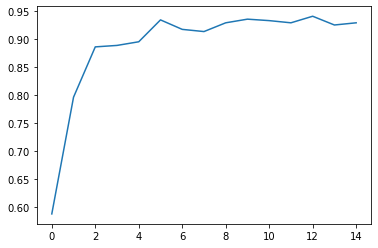

In [51]:
plot_hist(hist)

In [ ]:
print(T_label)
depth = 3
t = tf.one_hot(T_label, depth=5,
           on_value=1.0, off_value=0.0,
           axis=1) 
print(t.shape)

expected  :  wheat
predicted  :  wheat


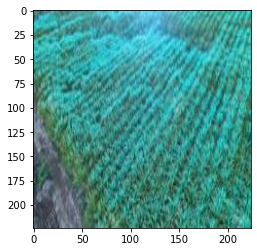

In [53]:
#plt.imshow(test_image[1].numpy().astype("uint8"))
#predictions = model.predict(test_image[1])
#predictions

for i, (image, label) in enumerate(train_dataset.take(1)):
    na=[j for j in range(5) if(label[i][j]==1)]
    print("expected  : ",name[na[0]])
    plt.imshow(image[0].numpy().astype("uint8"))
    predictions = model.predict(image)
    maxi=max(predictions[0])
    for i in range(5):
        if(predictions[0][i] == maxi):
            print("predicted  : ",name[i])
        